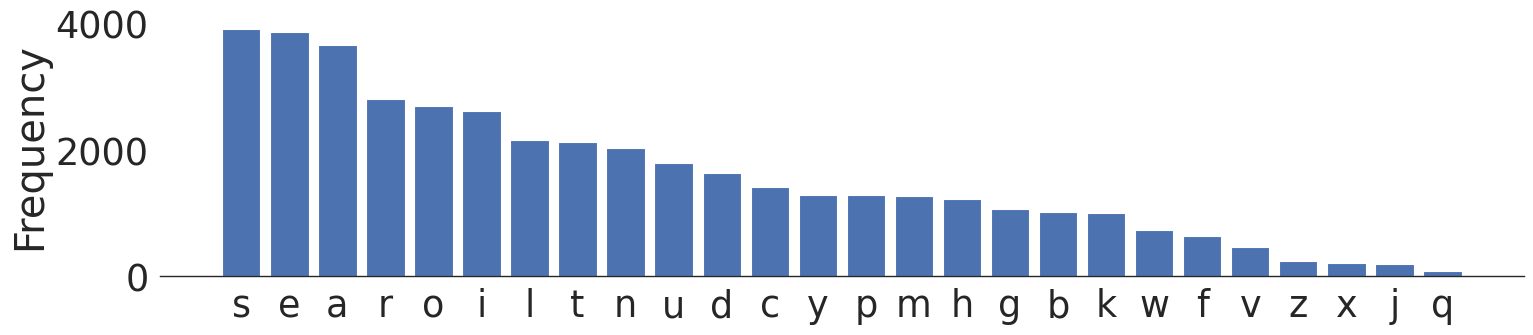

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="white", font_scale=3)

def parse_frequency_data(text):
    """Parse letter frequency text into lists of letters and frequencies."""
    letters = []
    frequencies = []
    
    for line in text.strip().split('\n'):
        letter, freq = line.split(':')
        letters.append(letter.strip())
        frequencies.append(int(freq.strip()))
    
    return letters, frequencies

# https://www.browserling.com/tools/letter-frequency

# Example text data (from unique_words.txt)
text_data = '''
s: 3927
e: 3874
a: 3680
r: 2814
o: 2709
i: 2627
l: 2164
t: 2127
n: 2044
u: 1798
d: 1642
c: 1422
y: 1300
p: 1296
m: 1273
h: 1233
g: 1074
b: 1016
k: 1014
w: 736
f: 648
v: 463
z: 239
x: 215
j: 192
q: 93
'''

letters, frequencies = parse_frequency_data(text_data)

# plt.rcParams.update({'font.size': 6})
fig, ax = plt.subplots(figsize=(16,4))


# ax.hist(range(len(letters)), bins=len(letters), weights=frequencies)

ax.bar(range(len(letters)), frequencies)


# ax.set_xlabel('Letters')
ax.set_ylabel('Frequency')
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.tick_params(axis='both', which='major')


plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0))
sns.despine(ax=ax, left=True)
plt.tight_layout()


plt.savefig("../result/figures/freq.png")
plt.savefig("../result/figures/freq.pdf")


plt.show()



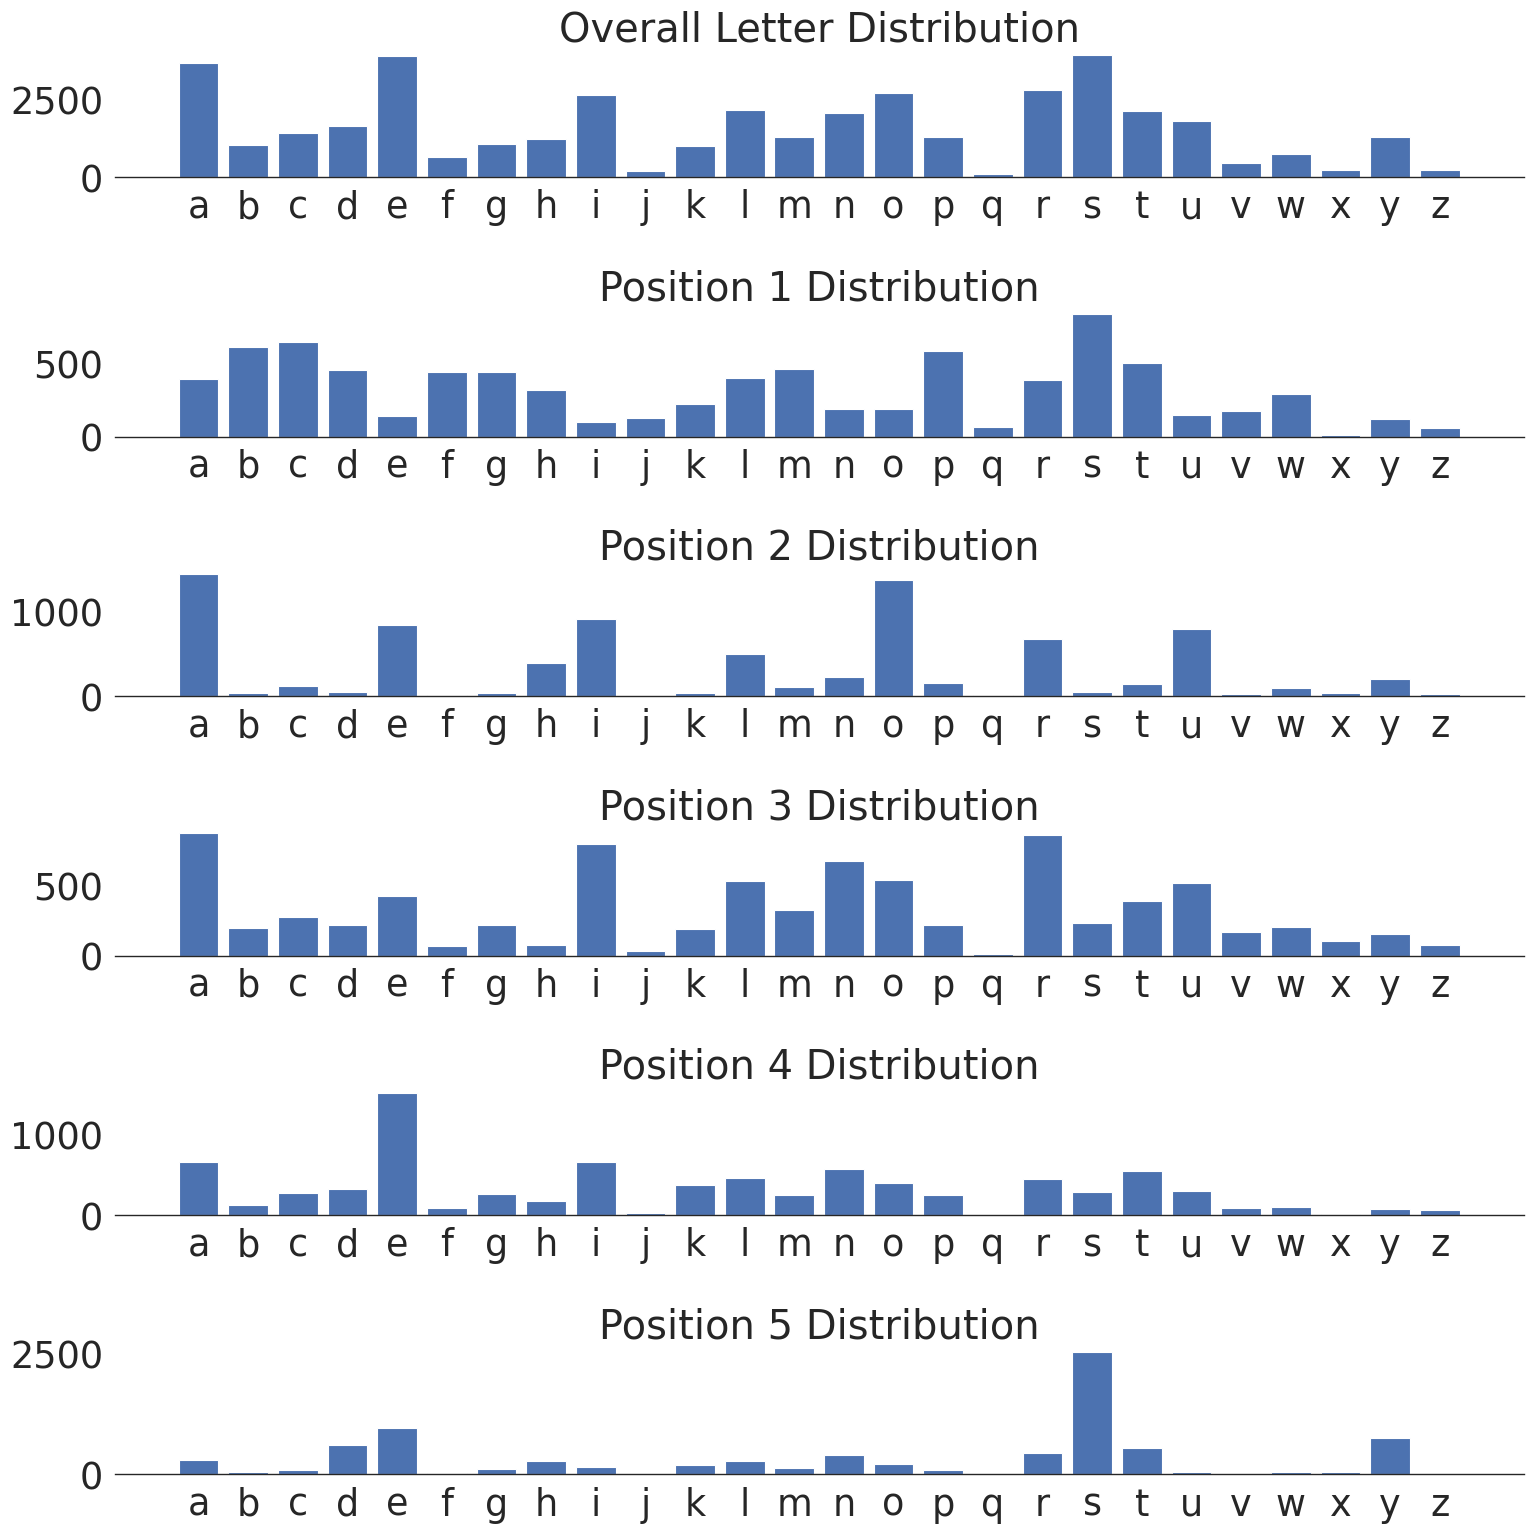

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

sns.set_theme(context="paper", style="white", font_scale=3)

def analyze_letter_frequencies(text):
    """Analyze overall and position-specific letter frequencies."""
    words = text.lower().split()
    
    # Overall frequency
    all_letters = ''.join(words)
    overall_freq = Counter(all_letters)
    
    # Position-specific frequency
    position_freq = [Counter() for _ in range(5)]  # For 5 positions
    for word in words:
        for i, letter in enumerate(word):
            if i < 5:  # Only count first 5 positions
                position_freq[i][letter] += 1
    
    return overall_freq, position_freq

def create_frequency_plot(text_data):
    # Analyze frequencies
    overall_freq, position_freq = analyze_letter_frequencies(text_data)
    
    # Create alphabet list for consistent x-axis
    alphabet = sorted(set(''.join(c for c in text_data.lower() if c.isalpha())))
    
    # Create figure with subplots - now in vertical layout
    fig, axs = plt.subplots(6, 1, figsize=(16, 16))
    
    # Plot overall frequency
    overall_values = [overall_freq.get(letter, 0) for letter in alphabet]
    axs[0].bar(range(len(alphabet)), overall_values)
    axs[0].set_title('Overall Letter Distribution')
    axs[0].set_xticks(range(len(alphabet)))
    axs[0].set_xticklabels(alphabet)
    axs[0].tick_params(axis='both', which='major')
    sns.despine(ax=axs[0], left=True)
    
    # Plot position-specific frequencies
    for i, pos_freq in enumerate(position_freq):
        values = [pos_freq.get(letter, 0) for letter in alphabet]
        axs[i+1].bar(range(len(alphabet)), values)
        axs[i+1].set_title(f'Position {i+1} Distribution')
        axs[i+1].set_xticks(range(len(alphabet)))
        axs[i+1].set_xticklabels(alphabet)
        axs[i+1].tick_params(axis='both', which='major')
        sns.despine(ax=axs[i+1], left=True)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

with open('../unique_words.txt', 'r') as file:
    sample_text = file.read()

# Create and save plots
fig = create_frequency_plot(sample_text)

# Save figures
plt.savefig("../result/figures/freq.png", dpi=300, bbox_inches='tight')
plt.savefig("../result/figures/freq.pdf", bbox_inches='tight')

plt.show()